<h2>PA4 Machine Learning</h2>
<h3> Instructions: </h3>
<ul>
<li> Please run all the cells to get full marks. </li>
<li> Submit the ipynb file as your final submission renamed as RollNumber_PA4.ipynb</li>
<li>The code MUST be implemented independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC.</li>
<li>10% penalty per day for 3 days after due date. No submissions will be accepted</li>
<li>Use procedural programming style and comment your code properly.</li>
<li><b>Deadline: </b>(Put the deadline for the assignment here)</li>
</ul>


In [ ]:
# All the necessary imports are made here if you want to include any of the other imports of your choice please do it in this cell
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

<h6>First upload the dataset on your google drive and then run the cell below to mount your drive with the path for it.</h6>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h6>We will first read the dataset from our drive and then print its shape.</h6>

In [ ]:
#Start by importing the dataset and printing its shape
dataset_pulstar = pd.read_csv("/content/drive/MyDrive/pulsar_data_train.csv")
dataset_pulstar.shape

(12528, 9)

<h6> Visualize the dataset by printing the first 10 rows of it in the cell below.</h6> 

In [ ]:
#Please write your code below
dataset_pulstar.head(10)

Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   
5                       121.007812   
6                        79.343750   
7                       109.406250   
8                        95.007812   
9                       109.156250   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   
5                                      47.176944   
6                                      42.402174   
7                                      55.912521   
8                                      40.219805   
9                                      47.002234   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   
5                                    0.229708   
6                                    1.063413   
7                                    0.565106   
8                                    0.347578   
9                                    0.394182   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                             3.388719                   2.399666   
2                            -0.297242                   2.743311   
3                            -0.171294                  17.471572   
4                             3.274125                   2.790134   
5                             0.091336                   2.036789   
6                             2.244377                 141.641304   
7                             0.056247                   2.797659   
8                             1.153164                   2.770067   
9                             0.190296                   4.578595   

    Standard deviation of the DM-SNR curve  \
0                                18.399367   
1                                17.570997   
2                                22.362553   
3                                      NaN   
4                                20.618009   
5                                      NaN   
6                                      NaN   
7                                19.496527   
8                                18.217741   
9                                      NaN   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.449874                      65.159298   
1                              9.414652                     102.722975   
2                              8.508364                      74.031324   
3                              2.958066                       7.197842   
4                              8.405008                      76.291128   
5                              9.546051                     112.131721   
6                             -0.700809                      -1.200653   
7                              9.443282                      97.374578   
8                              7.851205                      70.801938   
9                              5.702532                      36.342493   

   target_class  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  
6           0.0  
7           0.0  
8           0.0  
9           0.0

<h6>Now after examining the dataset you have seen that the column names are too long and to cater for this run the code cell below to rename the column names to the standard column names.</h6>

In [ ]:
#renaming the column names to more readable column names
dataset_pulstar.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']
dataset_pulstar.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

<h6>Now we will see if our dataset contains null values and if it contains the null values you are to drop them. Please write appropriate code below to check for null values in the dataset and drop them if necessary.</h6>

In [ ]:
#Please write your code below
dataset_pulstar.dropna(inplace=True)
dataset_pulstar.isna().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

<h6>Now we will use a suitable visualization to visualize the outliers if present in the dataset. Remember to not include the column with the name of `target_class` in the visualizations you create.</h6>

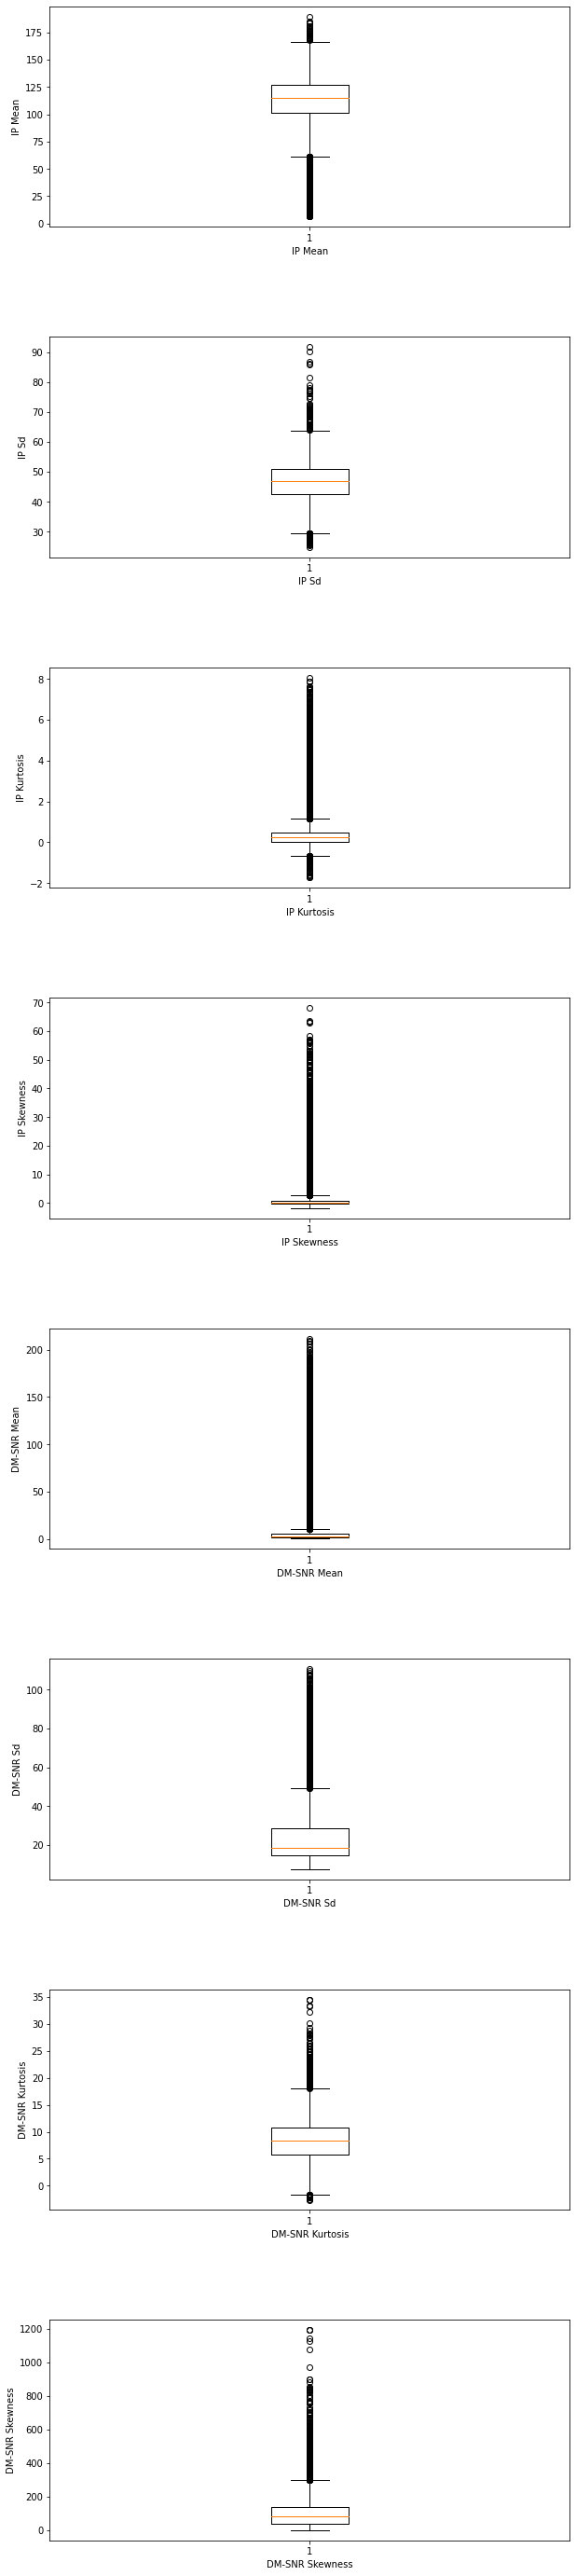

In [ ]:
#Please write your code below
fig, axes = plt.subplots(nrows=len(dataset_pulstar.columns)-1, figsize=(10, 50))

for i, column in enumerate(dataset_pulstar.columns):
    if column == "target_class":
      continue
    axes[i].boxplot(dataset_pulstar[column])
    axes[i].set_title('')
    axes[i].set_ylabel(f"{column}")
    axes[i].set_xlabel(f"{column}")

plt.subplots_adjust(hspace=0.5)

<h3>Task 1:</h3>
<h4>Now, we will use the SVM classifier to classify the outliers correctly and to the classes as we can see there are two unique values in target variable mapping to 0 and 1. So in this part you have to implement the linear SVM from scratch and follow the following steps.</h4>

Step 1: First drop the target variable named as `target_class` and store it seperately from the dataset. You would have to store the rest of the dataset in another variable.

In [ ]:
 # Store the target class column in the variable 'y' and the rest of the dataset in the variable 'X'.
 y = dataset_pulstar['target_class']
 X = dataset_pulstar.drop(['target_class'],axis=1)
 print(y.shape,X.shape)

(9273,) (9273, 8)


Step 2: Now you will split the datasets into test and train (80-20 or 70-30). So use the code cell below to make appropriate splits.

In [ ]:
#Please write your code below
rows = X.shape[0]
#Performing an 80-20 Split
X_train = X[:int(0.8*(rows))]
X_test = X[int(0.8*(rows)):]
y_train = y[:int(0.8*(rows))]
y_test = y[int(0.8*(rows)):]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7418, 8) (1855, 8) (7418,) (1855,)


Step 3: Now you have to standardize the columns in the dataset (X_train) and the columns in the dataset (X_test) so that the values are centered.

In [ ]:
X_train_std = (abs(X_train-np.mean(X_train,axis=0)))/np.std(X_train,axis=0)
X_test_std = (abs(X_test-np.mean(X_test,axis=0)))/np.std(X_test,axis=0)

Step 4: You have to now implement the Linear SVM model and you are provided with the boiler plate code in the cell below:
Some formulas for the derivatives that might be useful are attached as snippets for your information.

The equation that we will follow for calculating the hyperplane that best fits our model is given below:

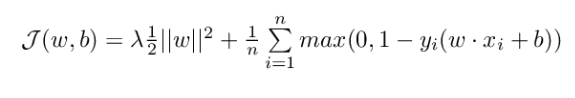

We can break the equation above into two steps which is potrayed by the step function below:

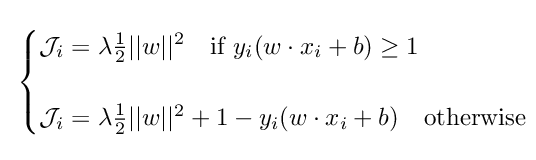

Now the derivatives for the step function are specified as follows:

Case 1:<br>
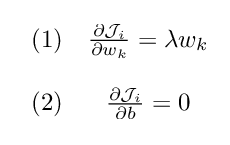

Case 2:
<br>
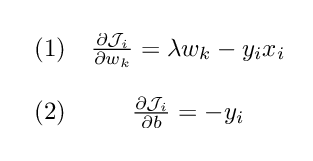

In [ ]:
class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        '''
        This is the constructor for our SVM class and its passed 3 parameters which are defined as follows:
        -> Learning_rate: This is the step_size that you would take in order for your algorithm to converge
        -> lambda_param: This specifies the constant which is used for regularization as taught to you in class
        -> n_iters: This specifies the epochs that you would take for the algorithm to converge.
        '''
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def initialize_weights_and_bias(self, X):
        '''
        In this function you are to initialize the weights initally to zero. The variables passed as arguments are as follows:
        -> X: This is the original dataset X which will help you specify the n_features that you should have. 
        
        TODO: You have to initialize the weights of the model and the bias variable to zero.
        '''
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def get_classfication_map(self, y):
        '''
        In this function you will map you binary target variables to either -1 and 1 as taught 
        to you in class forming the two margins to your actual hyperplane. You are given with the variable y as the parameter which is defined below:
        -> y: Here y, represents a single target value corresponding to a datapoint in your train dataset.
        
        TODO: You would have to return a value -1 or 1 if the value of the variable y is less than or equal to zero and 1 otherwise.
        '''
        return np.where(y <= 0, -1, 1)

    def constraint_satisfaction(self, x, idx):
        '''
        In this function you are given with the following arguments:
        -> x: Here x, represents the datapoint from your train dataset.
        -> idx: This idx variable represents an index that maps to the current datapoint x that you are processing.
        
        TODO: 
        -> You have to make up a linear model by multiplying the weights 
        and adding the bias term to it.
        -> Make up a predicate which returns true if product of the linear_model 
        value with the class label is greater than or equal to 1 and otherwise false.
        '''
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def cal_gradients(self, constrain, x, idx):
        '''
        In this function you are given the following parameters:
        -> constrain: This is a bool which will help you calculate the derviatives 
        of the two cases where the datapoint either lies above the hyperplane or below the hyperplane.
        -> x: Here x, represents an individual datapoint from your train dataset.
        -> idx: This idx variable represents an index that maps to the current datapoint x that you are processing.

        TODO: 
        -> Here you will handle the two cases where your datapoint lies above 
        the hyperplane or below it with the help of the constrain (boolean).
        -> if the datapoint lies above the hyperplane:
        * Then calculate variables dw & db by using the equations specified above.
        Otherwise:
        * Use the formulas specified above to calcualte dw & db.
        '''
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def update_weights_and_bias(self, dw, db):
       '''
       In this function you are provided with the following parameters:
       -> dw: This represents the derivatives for your weights as calculated by the cal_gradients function.
       -> db: This represnets the derivatives for your biases as calcuated by the cal_graidents function.

       TODO:
       You have to simply update the weights by multiplying it with the learning rate as you do in gradient descent.
       '''
       self.w -= self.lr * dw
       self.b -= self.lr * db
    
    def fit(self, X, y):
        '''
        This is the fit function in which you are provided with the following parameters:
        X: The complete train dataset.
        y: Your target values associated with the train dataset.

        TODO:
        -> First you would need to initialize your weights and biases by calling your implementation of the following functions:
        * initialize_weights_and_bias()
        * get_classfication_map -> store the return value in the variable self.cls_map for future reference.
        -> Now you would have to run a loop for your number of epochs and 
        for each epoch you would have to check every datapoint for the constraint 
        and then calculate the gradients and update them accordingly
        '''
        self.initialize_weights_and_bias(X)
        self.cls_map = self.get_classfication_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self.constraint_satisfaction(x, idx)
                dw, db = self.cal_gradients(constrain, x, idx)
                self.update_weights_and_bias(dw, db)
    
    def predict(self, X):
        '''
        In this function you would have to predict whether your hyperplane that you have fitted on the data is correct or not.
        The parameters to the function are the following:
        -> X: Reperesents your train dataset.

        TODO: After running the fit function take the dot product of X with your updated weights and up the biases.
        Make use of the np.sign function and np.where function to map your -1 labels to 0 and 1.

        Rember: You mapped the values to -1 and 1 in the constraint_satsifaction function so you have to map them back to 0 and 1 respectively.
        '''
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

In [ ]:
# Convert your datasets to numpy arrays here. Please write your code below:
X_dataset_numpy = np.array(X_train)
y_dataset_numpy = np.array(y_train)
X_test_numpy = np.array(X_test)

In [ ]:
# Make a call to the class by initliazing the n_iters or the epochs and then call the fit function passing them the appropriate arguments. 
# After doing this you are to call the predict function by passing in the appropriate arguments as well
clf = SVM(n_iters=300)
clf.fit(X_dataset_numpy, y_dataset_numpy)
predictions = clf.predict(X_test_numpy)

In [ ]:
# Define your manual accuracy function here. Please write the code below:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

In [ ]:
# Print the accuracy you are getting from the linear model below:
print("SVM Accuracy: ", accuracy(y_test, predictions)*100)

SVM Accuracy:  97.25067385444744


### Problem with dispersed datasets


Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.


### Kernel trick - transformation of input space to higher dimensional space

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)

# **Kernel trick** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

In the context of SVMs, there are 4 popular kernels – `Linear kernel`,`Polynomial kernel`,`Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. We will be focussing on the polynomial kernel.

# **Polynomial Kernel**

Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

**Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0**

Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.

### Polynomial Kernel

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

# Use a Non-linear SVM model to classify your dataset.
Write a function, which takes among its parameters, the coefficient C and generates an SVM classifier. Then it trains the classifier using the training data and then runs the classifier on the test data. <br>
Using these results predict the accuracy and F1-score for each value of C. <br>
Note: Remember to generalize this function so that it may run for different values of C. 

## Run SVM with polynomial kernel and C=1.0

In [ ]:
### Code Here

### ----------

## Run SVM with polynomial kernel and C=100.0

In [ ]:
### Code Here

### ----------

## Run SVM with polynomial kernel and C=1000.0

In [ ]:
### Code Here

### ----------

#Results
Plot the confusion matrix for each of the above three instances. You may use any libraries you may wish to.


In [ ]:
### Code Here

### ----------

# Analysis
a) For which value of C did the polynomial kernel give the best results? <br>
b) Compare the results of your linear and your best polynomial kernel model, in part (a)?

Write your answer here.